<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Tools&Functions

In [2]:
import pandas as pd
import numpy as np
import pickle
import os

from itertools import product
from sklearn.preprocessing import normalize

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
from IPython.display import Image
%config InlineBackend.figure_format = 'svg'

In [3]:
os.chdir('./data/')

In [4]:
def draw_kmer_violin(data, rows_normalized = False, cols_standardized = False, title = ''):
        
    #row normalization
    if rows_normalized == True:
        data_normalized = normalize(data, axis = 1, norm = 'l1')
        title = title + "\n rows normalized"
        
    elif rows_normalized == False:
        data_normalized = data.values
    
    #column standardization
    if cols_standardized == True:
            sample_mean = data_normalized.mean(axis=0)                                                                                                                                                                 
            sample_std = data_normalized.std(axis=0) 
            data_normalized = (data_normalized - sample_mean) / sample_std
            title = title + "\n columns standardized"
    
    # Make overall dataframe    
    df = pd.DataFrame(data_normalized, columns = kmer_names)
    df['Status'] = labels
    
    # Get top 20 most informative kmers    
    imp_feats_sub = imp_feats_df.head(n=20)
    feats = imp_feats_sub['Kmer'].tolist()
    df_impt = pd.DataFrame(df, columns = feats)
    df_impt['Status'] = labels
    
    # Disease v Healthy
    df_healthy = df_impt.loc[df_impt['Status'] == 0.0]
    df_disease = df_impt.loc[df_impt['Status'] == 1.0]
    both = df_disease.append(df_healthy)
    both = both.melt(id_vars = 'Status')
    
    # Make the plot
    ax = sns.violinplot(data=both, x = 'variable', y = 'value', hue = 'Status',  inner = None, 
                        bw = .05, split = True, palette = "Paired")
    plt.ylabel("Abundance")
    plt.xlabel("Informative Kmer")
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

In [5]:
# List of 10mer names
kmer_names = []
with open("10mer_dictionary") as text:
    for line in text:
        line = line.rstrip("\n")
        kmer_names.append(line)

# MetaHIT

## Loading and prepping data

In [6]:
# Most important features
imp_feats = pd.read_csv('metahit_important_features.txt', sep = '\t')
imp_feats = imp_feats.iloc[:,0:2]
imp_feats_df = imp_feats.rename(index=str, columns={"Importances": "Kmer", "for": "Score"})
imp_feats_df.head()

Kmer     Score
0  AATGGAAAGG  0.000895
1  CCTCTTTCAG  0.000770
2  CTACAAAAAG  0.000724
3  ATGGAAAGGA  0.000689
4  ACCAAAGCGT  0.000660

In [7]:
# Loaded kmer abundances
kmers = pd.read_pickle("metahit10mers.pickle")

# Disease labels
labels = pd.read_csv("metahit10mers.csv")

## Violin plot

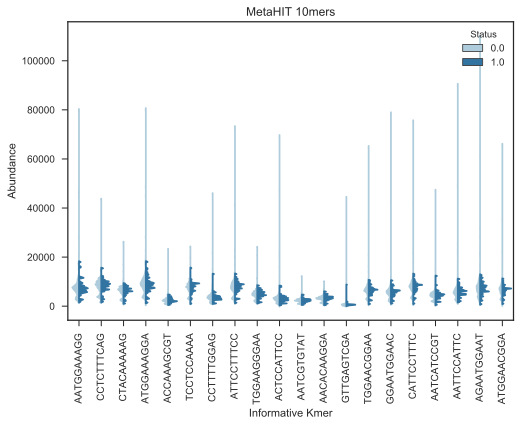

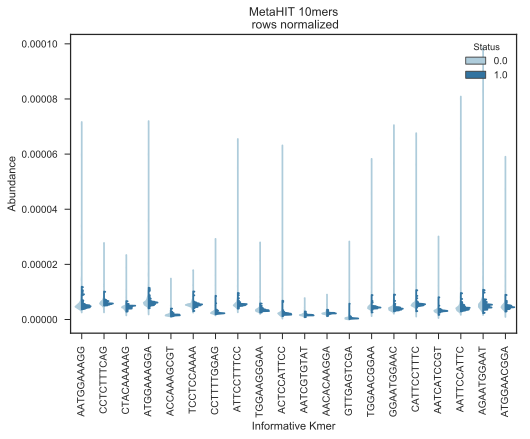

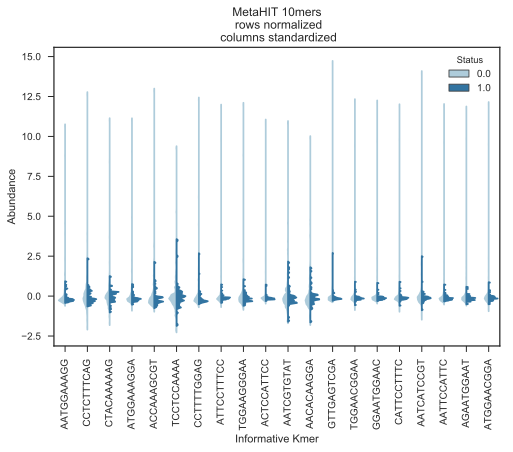

In [8]:
draw_kmer_violin(kmers, title = "MetaHIT 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, title = "MetaHIT 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, cols_standardized=True, title = "MetaHIT 10mers")
plt.show()

# Karlsson

## Loading and prepping data

In [10]:
# Most important features
imp_feats = pd.read_csv('importances_karlsson_linear_best_model.txt', sep = '\t', header = None)

# Loaded kmer abundances
kmers = pd.read_pickle("karlsson10mers.pickle")

# Disease labels
labels = pd.read_csv("karlsson10mers.csv")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Violin plot

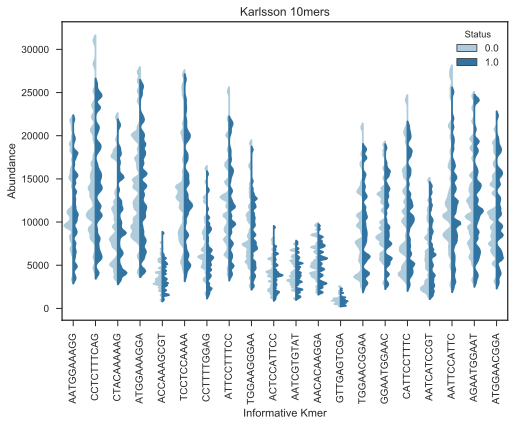

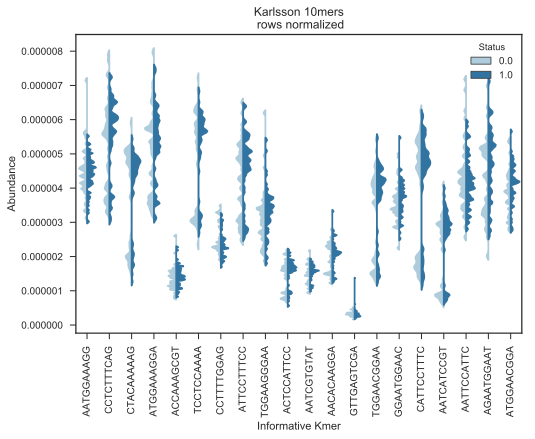

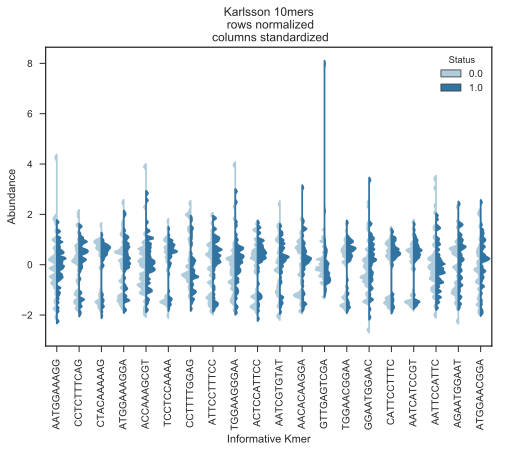

In [11]:
draw_kmer_violin(kmers, title = "Karlsson 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, title = "Karlsson 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, cols_standardized=True, title = "Karlsson 10mers")
plt.show()

# Qin

## Loading and prepping data

In [12]:
# Most important features
overall = pd.read_csv('other_top_100_feat_imps.txt', sep = ' ')

In [13]:
#just get Qin data
imp_feats_Qin = overall.iloc[:101,:]
imp_feats_Qin = imp_feats_Qin.iloc[:,0:1]
imp_feats_Qin = imp_feats_Qin.iloc[1:,:]
imp_feats_Qin['Kmer'], imp_feats_Qin['Score'] = imp_feats_Qin['SORTING'].str.split('\t', 1).str
imp_feats_Qin = imp_feats_Qin.drop(['SORTING'], axis = 1)
#imp_feats.head()

In [14]:
# Loaded kmer abundances
kmers = pd.read_pickle("Qin10mers.pickle")

# Disease labels
labels = pd.read_csv("Qin10mers.csv")

## Violin plot

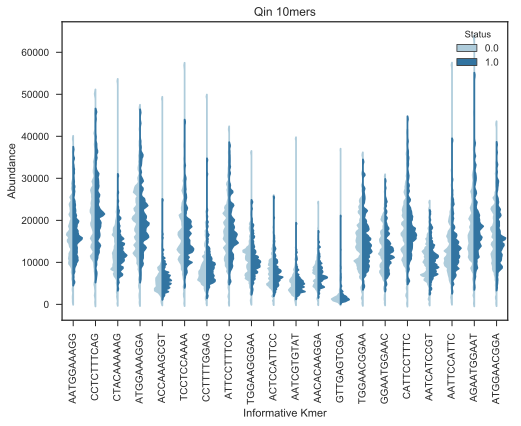

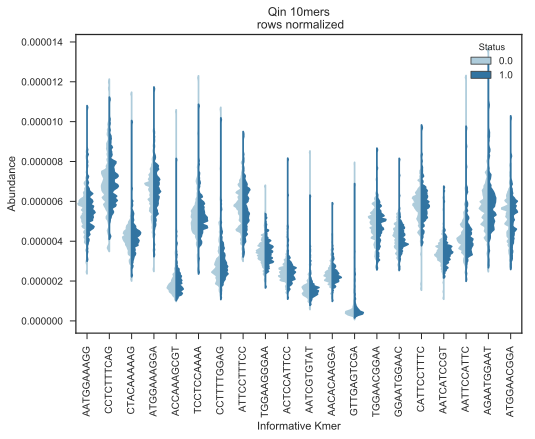

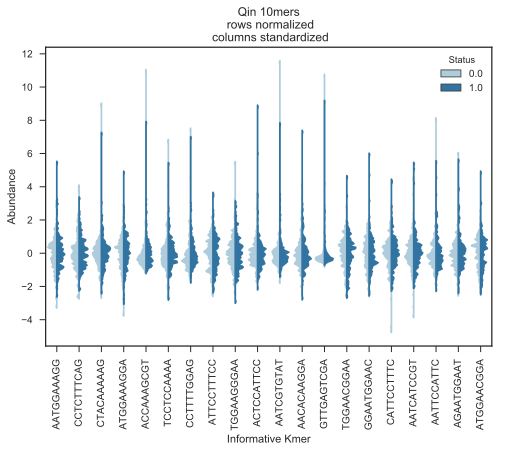

In [15]:
draw_kmer_violin(kmers, title = "Qin 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, title = "Qin 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, cols_standardized=True, title = "Qin 10mers")
plt.show()

# RA

## Loading and prepping data

In [16]:
# Most important features
#just get RA data
imp_feats_RA = overall.iloc[204:,:]
imp_feats_RA = imp_feats_RA.iloc[:,0:1]
imp_feats_RA = imp_feats_RA.iloc[1:,:]
imp_feats_RA['Kmer'], imp_feats_RA['Score'] = imp_feats_RA['SORTING'].str.split('\t', 1).str
imp_feats_RA = imp_feats_RA.drop(['SORTING'], axis = 1)
imp_feats_RA.head()

Kmer              Score
205  TAAGCAAAAA  0.000254016522684
206  AATTATAAAA  0.000221633990803
207  AAGAGCCATG  0.000208788657382
208  AAAATCAAAT  0.000193604735783
209  AAAAAGTTGA  0.000184764149189

In [17]:
# Loaded kmer abundances
kmers = pd.read_pickle("RA10mers.pickle")

# Disease labels
labels = pd.read_csv("RA10mers.csv")

## Violin plot

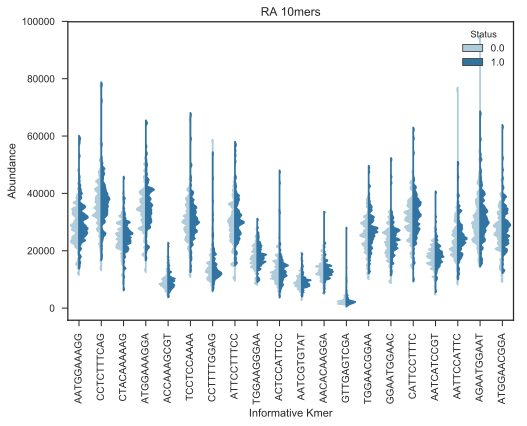

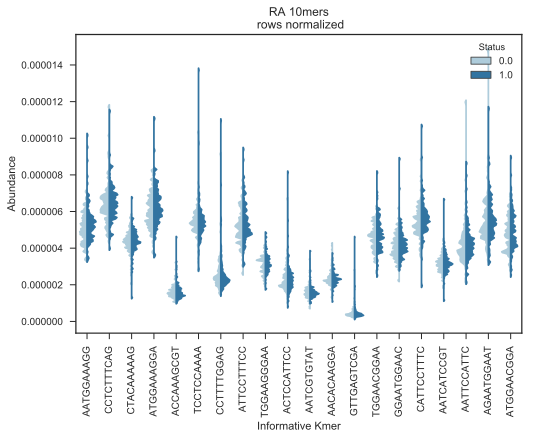

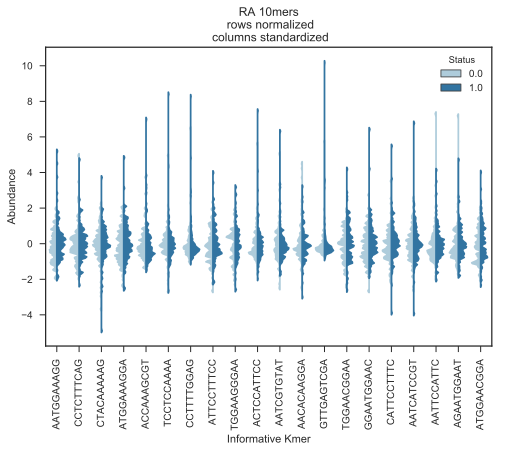

In [18]:
draw_kmer_violin(kmers, title = "RA 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, title = "RA 10mers")
plt.show()

draw_kmer_violin(kmers, rows_normalized=True, cols_standardized=True, title = "RA 10mers")
plt.show()